# 簡述


剛剛看到yutin1987上傳的2018台灣公投的[所有開票所的結果](https://github.com/g0v/referendum_report/tree/master/results2)，出於對資料的手癢，就立即下載下來跑了分析。不跑不知道，一跑嚇一跳。通過初步的描述分析就可以發現，中選會公佈的有些開票所的結果出現了明顯不合理的數據！這些開票所的結果是不可以信賴的！

廢話不多說，直接上結果。

首先，這是所有公投案之間的散點圖。可以看到，與鄉鎮層級的結果不同的是，在每張圖上，垂直和水平方向都出現了不少的觀測值，這是不合常理的。

<img src="scatter.png">

我們隨便看看其中的一張。
<img src="scatter_1.png">

我一開始以為是極端值特有的屬性，但是看到下面這張圖，就發現有些開票結果是明顯有問題的。這是第14案vs第15案的散點圖。我們知道這兩案都是平權放提出的，結果應該高度正相關。在絕大多數的開票所，結果也確實是高度相關。但是，散點圖也顯示，有不少的奇怪的觀測值出現在圖的正上方和正右方。若干仔細看這些極端值的話，他們在兩個公投案的結果上是負相關的！
<img src="scatter_2.png">

畫上兩條線後，一目了然！兩條斜度是1和-1的斜線可以幾乎完美地貫穿所有的觀測值。+1斜線附近的觀測值是正常的。-1斜線附近的觀測值是不正常的，在這些開票，有一案的公投結果應該是報反了！
<img src="scatter_3.png">

我們可以直接在中選會的網站上找到這些開票所的結果。例如，以南投縣中寮鄉0373開票所為例。下面是兩案結果的鏈接：

http://referendum.2018.nat.gov.tw/pc/zh_TW/08/10008000800000373.html

http://referendum.2018.nat.gov.tw/pc/zh_TW/09/10008000800000373.html

我們可以看到，14案和15案的結果是相反的。隨便再舉一例：高雄市三民區0943開票所。

http://referendum.2018.nat.gov.tw/pc/zh_TW/08/64000000500000943.html

http://referendum.2018.nat.gov.tw/pc/zh_TW/09/64000000500000943.html

這些結果是明顯不合理的。

結論：中選會公佈的公投案結果有重大瑕疵。雖然出問題的投票所應該不是很多，當不會影響總體的結果。但這依然是一個非常嚴肅的問題！

以下是代碼。


# 代碼


首先，載入需要用的python包以及畫圖用的字體。

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

font = matplotlib.font_manager.FontProperties(fname='C:\\Windows\\Fonts\\kaiu.ttf')

載入數據。數據的路徑是我個人電腦上的路徑。

In [2]:
folder = 'referendum_report\\results2'
files = os.listdir(folder)

DF = pd.read_csv(folder + os.sep + files[0], engine = 'python', encoding = 'utf8')
for file in files[1:]:
    path = folder + os.sep + file
    df = pd.read_csv(path, engine = 'python', encoding = 'utf8')
    DF = DF.append(df)

目前很多對開票結果的分析都有一個同樣的問題，都是會直接用支持或反對的比例作為變項進行分析。我們知道比例的取值範圍在[0,1]區間上，這樣的變量是不適用於線性模型的。更好的選擇應是：

$\log(\frac{同意票數}{不同意票數})$，也就是邏輯迴歸中的log odds. 經過轉換後，新生成的變項的取值範圍在$(-\infty, \infty)$。 0對應的是同意數=反對數。

為了處理分母或者分子是零的情況，我在分母和分子上各加了0.1。

In [3]:
DF['odds'] = (DF['同意票數']+0.1)/(DF['不同意票數'] + 0.1)
DF['log_odds'] = np.log(DF.odds)

我之前的分析發現金門和連江的鄉鎮的開票結果相較台灣和澎湖的結果極端，所以先排除金門和連江的觀測值。

In [4]:
DF1 = DF[(DF['縣市'] != '金門縣') & (DF['縣市'] != '連江縣')]

生成投票所的信息

In [5]:
DF1['post'] = DF1['縣市'] + DF1['鄉鎮市區'] +  DF1['編號'].astype('str')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


以投票所為單位，將數據從long format轉換成wide format，並調整變項的排序。

In [8]:
WDF = DF1.pivot(index='post', columns='案件', values='log_odds')
WDF1 = WDF.iloc[:,[7,8,9,0,1,2,3,4,5,6]]
cols = WDF1.columns

這個數據就是我們想要的了

In [32]:
WDF1.head(10)

案件,第7案,第8案,第9案,第10案,第11案,第12案,第13案,第14案,第15案,第16案
post,,,,,,,,,,
南投縣中寮鄉353,1.437999,1.116020,1.233503,1.531830,0.873250,0.417948,0.020526,-1.008260,-0.976428,0.371391
南投縣中寮鄉354,1.717419,1.183523,1.105972,1.505307,1.078648,0.755174,-0.147721,-0.969577,-0.944323,0.345772
南投縣中寮鄉355,1.672646,1.427365,1.285866,1.563359,1.063239,0.300404,-0.377217,-1.023972,-0.968301,0.404487
南投縣中寮鄉356,1.686092,1.114655,1.614207,1.230124,0.967049,0.548606,-0.206542,-1.138718,-0.748224,0.298591
南投縣中寮鄉357,1.336953,1.307904,1.427216,1.390167,0.747965,-0.081419,-0.036668,-1.068325,-0.883626,0.377261
南投縣中寮鄉358,1.408028,1.291594,1.156638,1.419582,0.935081,0.332815,-0.227010,-1.362170,-1.257208,0.526154
南投縣中寮鄉359,1.246268,0.949988,1.162968,1.308593,0.799528,0.225823,-0.553524,-1.401855,-1.124856,0.368547
南投縣中寮鄉360,1.634415,1.351405,1.273066,1.652993,1.137368,0.328071,-0.201632,-1.456552,-0.970470,0.507438
南投縣中寮鄉361,1.494688,1.334418,1.202181,1.567409,1.180663,0.334124,-0.131914,-0.977080,-1.038828,0.462080


畫出所有的散點圖。

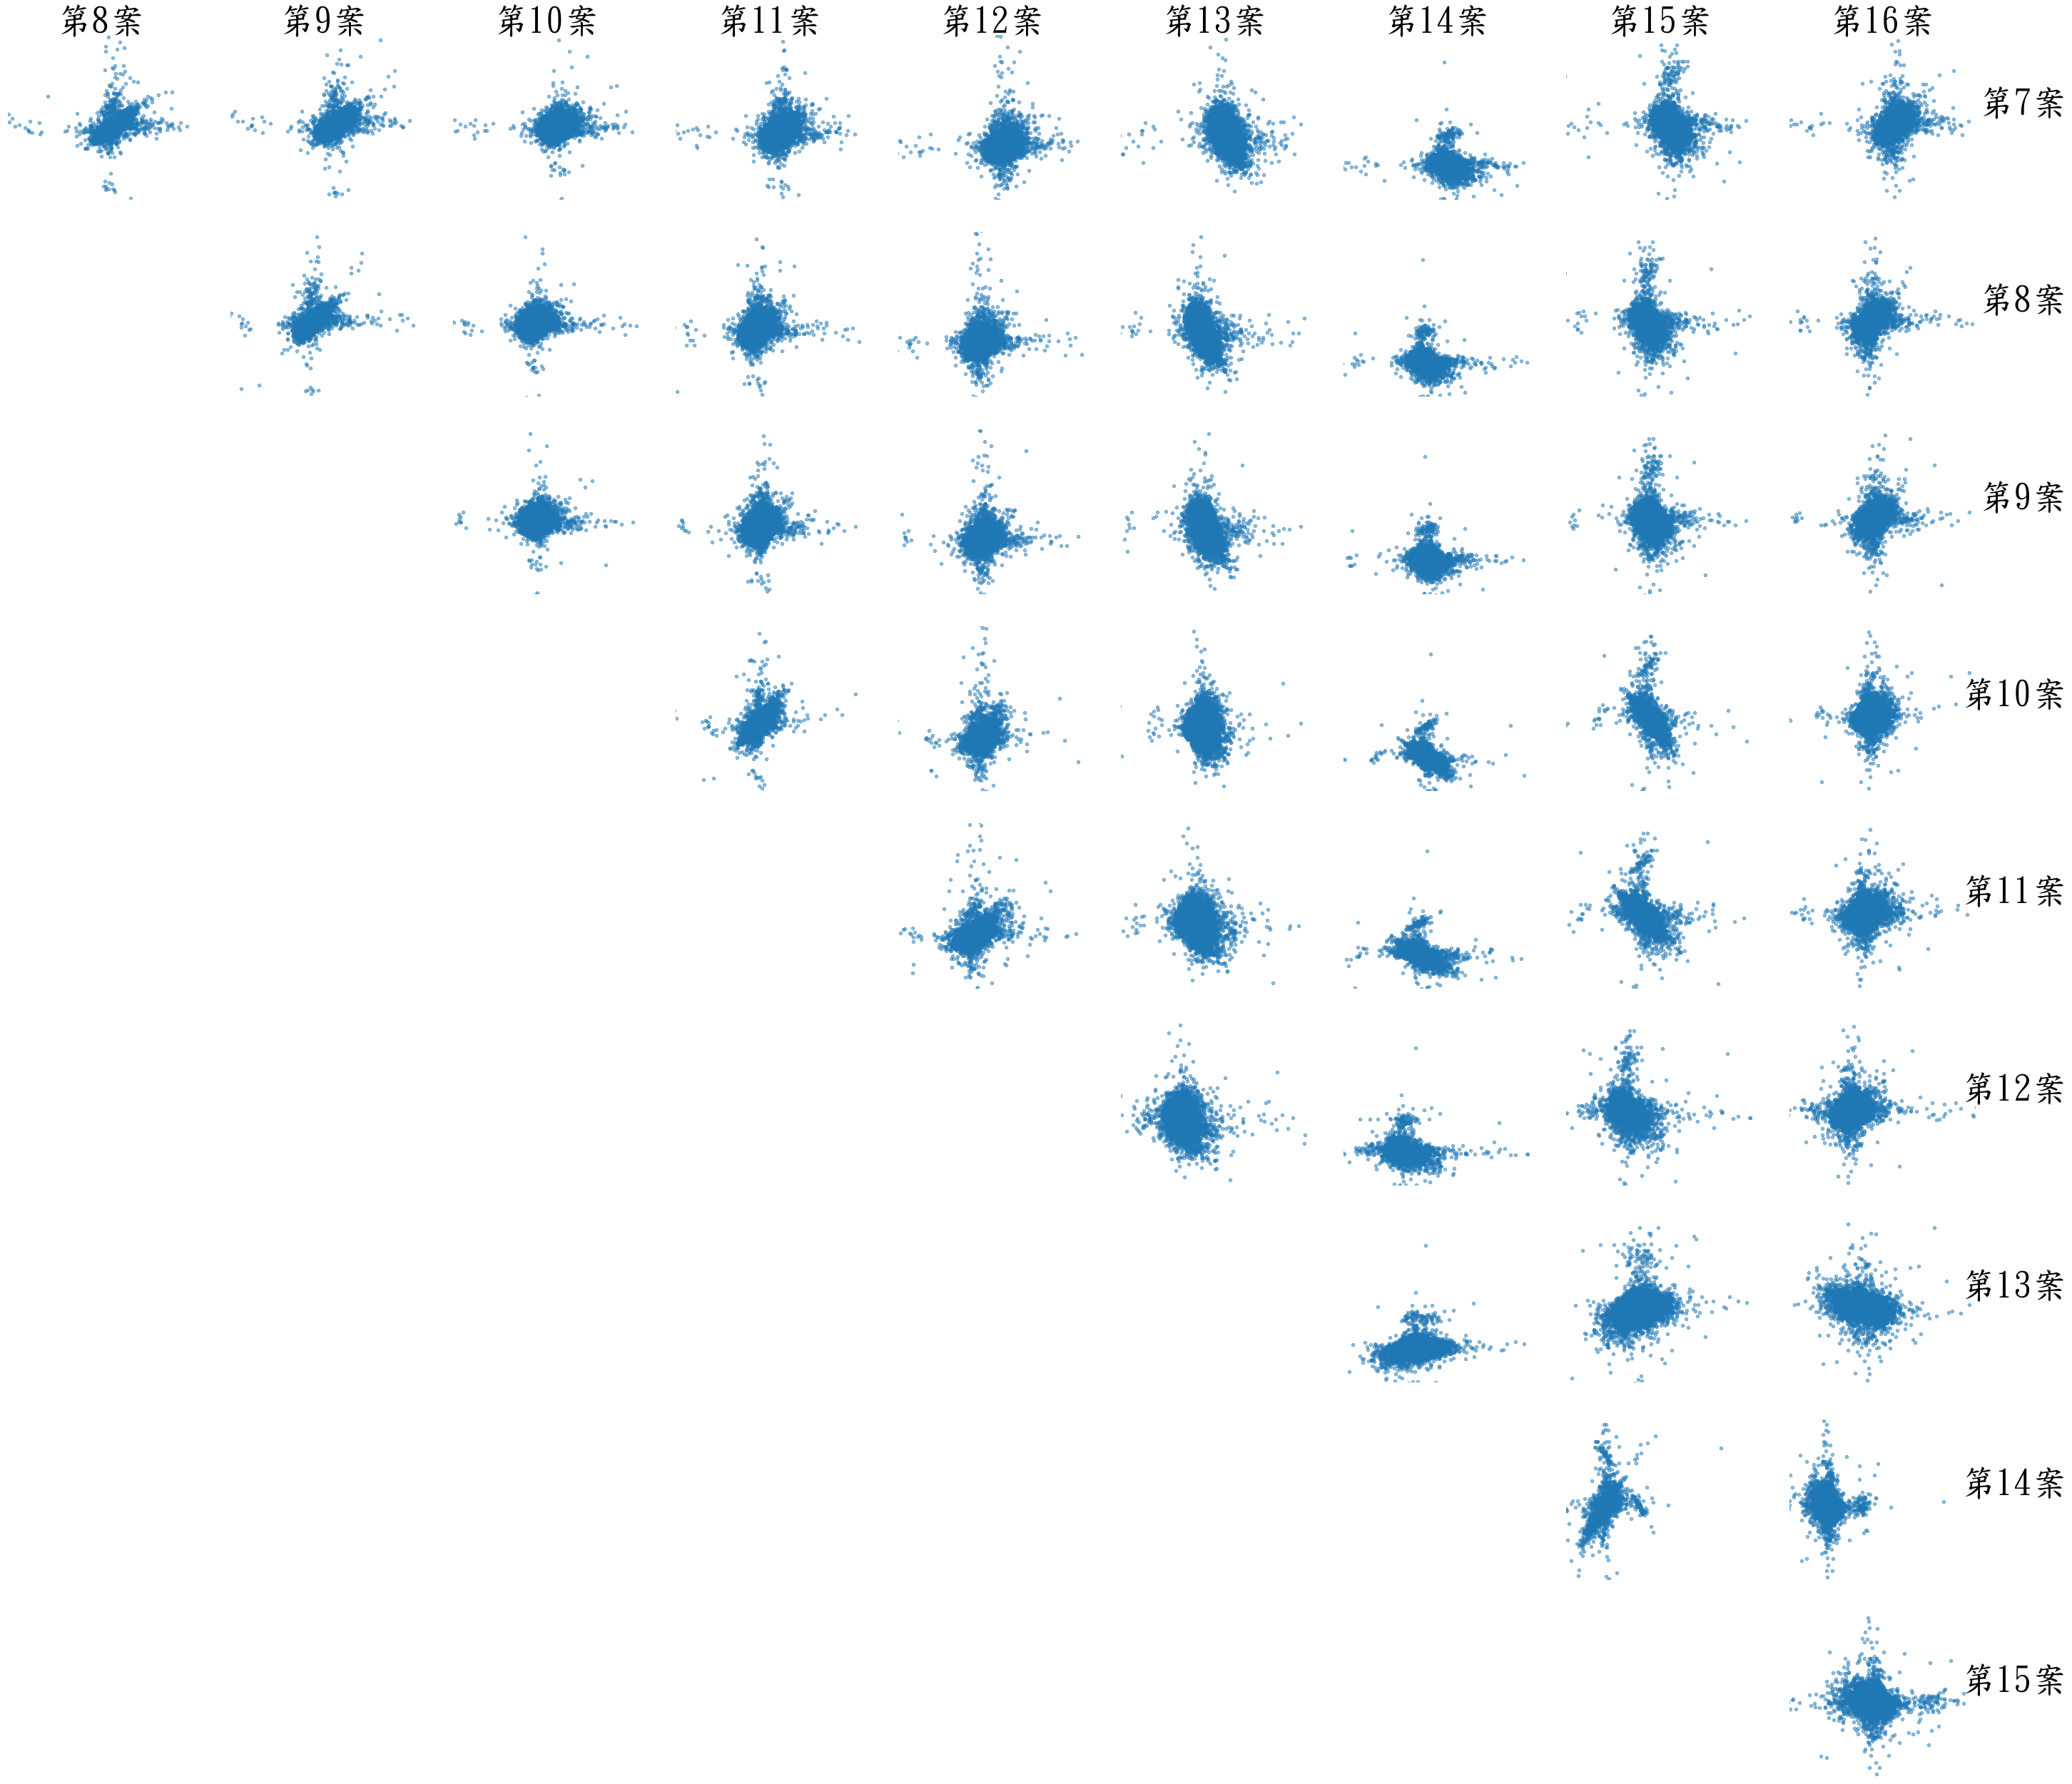

In [22]:
title_font = matplotlib.font_manager.FontProperties(fname='C:\\Windows\\Fonts\\kaiu.ttf', size = 50)
fig = plt.figure(figsize = (55,50))
for i in range(0,10):
    for j in range(i+1,10):
        ax = fig.add_subplot(10,10, i*10 + j+1)
        ax.set_frame_on(False)
        x = WDF1.iloc[:,i]
        y = WDF1.iloc[:,j]
        xlim = x.quantile([.0001,.9999])
        ylim = y.quantile([.0001,.9999])
        ax.scatter(x,y, s=20, alpha = 0.5)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.xticks(())
        plt.yticks(())
        if i == 0:
            ax.set_title(cols[j], fontproperties = title_font)
        if j == 9:
            ax.set_title(cols[i], fontproperties = title_font, loc = 'right', x = 1.5, y = 0.5)
plt.savefig('scatter.png')
plt.show()

隨便畫其中一個。

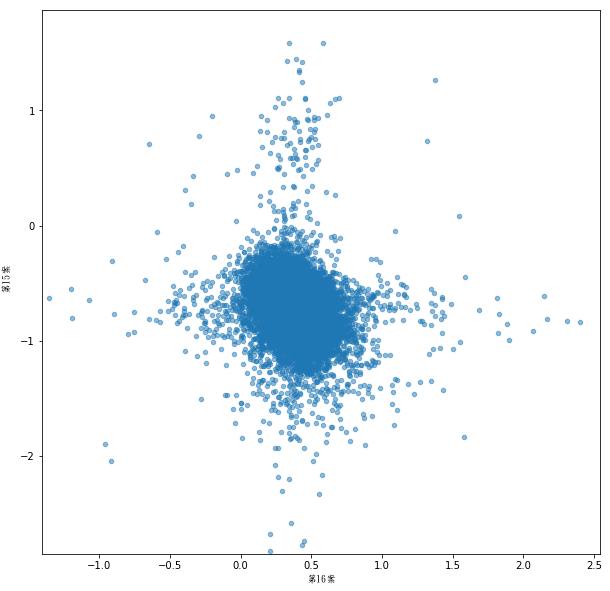

In [25]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
#ax.set_frame_on(False)
x = WDF1.iloc[:,-1]
y = WDF1.iloc[:,-2]
xlim = x.quantile([.0001,.9999])
ylim = y.quantile([.0001,.9999])
ax.scatter(x,y, s=20, alpha = 0.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xlabel(cols[-1], fontproperties = font)
plt.ylabel(cols[-2], fontproperties = font)
#plt.xticks(())
#plt.yticks(())
plt.savefig('scatter_1.png')
plt.show()

14案vs15案的散點圖。

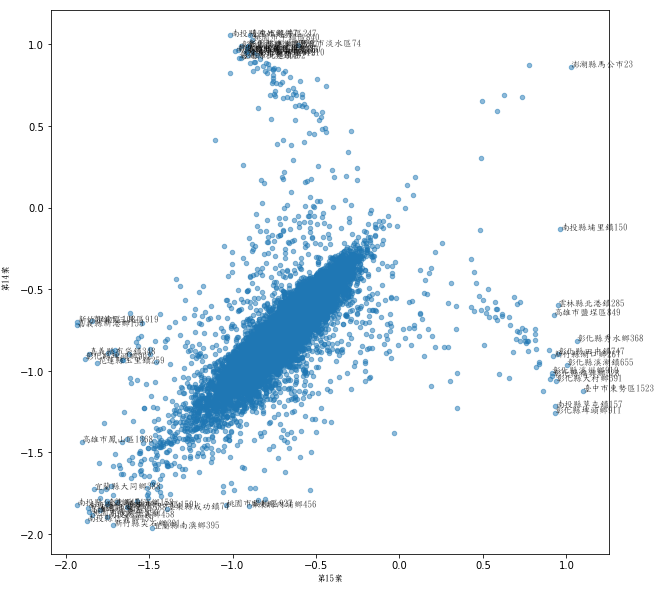

In [26]:
plt.close('all')
fig = plt.figure(figsize = (10,10))
#x = fig.add_subplot(111)
#ax.set_frame_on(False)
x = WDF1.iloc[:,-2]
y = WDF1.iloc[:,-3]
xlim = x.quantile([.001,.999])
ylim = y.quantile([.001,.999])
x_extreme = x.quantile([.002,.998])
y_extreme = y.quantile([.002,.998])
selected = WDF1[(x<xlim[0.999]) & (x>xlim[0.001]) & (y<ylim[0.999]) & (y>ylim[0.001])]
plt.scatter(selected.iloc[:,-2], selected.iloc[:,-3], s=20, alpha = 0.5)
s_x = selected.iloc[:,-2]
s_y = selected.iloc[:,-3]
extreme = selected[((s_x>x_extreme[0.998]) & (s_x<xlim[0.999]))|
                   ((s_x<x_extreme[0.002]) & (s_x>xlim[0.001]))|
                   ((s_y>y_extreme[0.998]) & (s_y<ylim[0.999]))|
                   ((s_y<y_extreme[0.002]) & (s_y>ylim[0.001])) ]
for i, index in enumerate(extreme.index):
    plt.annotate(index, (extreme.iloc[i,-2], extreme.iloc[i,-3]), fontproperties = font, alpha = 0.7, size = 9)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)
plt.xlabel(cols[-2], fontproperties = font)
plt.ylabel(cols[-3], fontproperties = font)
#plt.xticks(())
#plt.yticks(())
plt.savefig('scatter_2.png')
plt.show()

加兩條斜線。

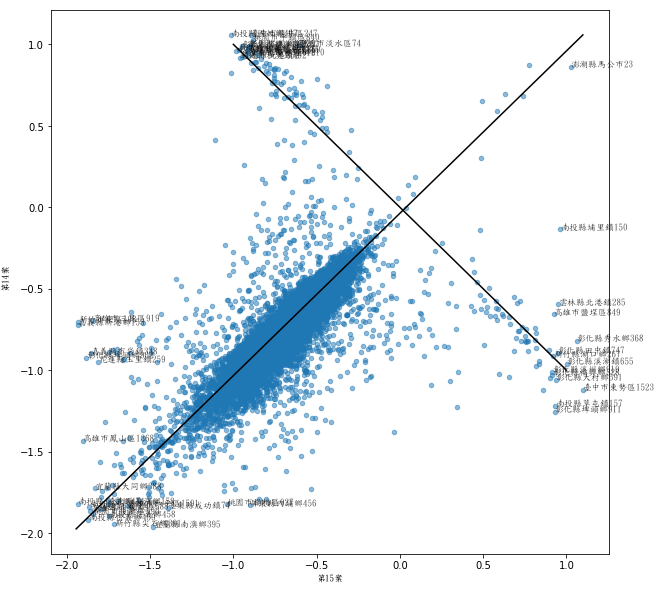

In [27]:
plt.close('all')
fig = plt.figure(figsize = (10,10))
#x = fig.add_subplot(111)
#ax.set_frame_on(False)
x = WDF1.iloc[:,-2]
y = WDF1.iloc[:,-3]
xlim = x.quantile([.001,.999])
ylim = y.quantile([.001,.999])
x_extreme = x.quantile([.002,.998])
y_extreme = y.quantile([.002,.998])
selected = WDF1[(x<xlim[0.999]) & (x>xlim[0.001]) & (y<ylim[0.999]) & (y>ylim[0.001])]
plt.scatter(selected.iloc[:,-2], selected.iloc[:,-3], s=20, alpha = 0.5)
plt.plot(xlim, ylim, color = 'black')
plt.plot([-1,1],[1,-1],color = 'black')
s_x = selected.iloc[:,-2]
s_y = selected.iloc[:,-3]
extreme = selected[((s_x>x_extreme[0.998]) & (s_x<xlim[0.999]))|
                   ((s_x<x_extreme[0.002]) & (s_x>xlim[0.001]))|
                   ((s_y>y_extreme[0.998]) & (s_y<ylim[0.999]))|
                   ((s_y<y_extreme[0.002]) & (s_y>ylim[0.001])) ]
for i, index in enumerate(extreme.index):
    plt.annotate(index, (extreme.iloc[i,-2], extreme.iloc[i,-3]), fontproperties = font, alpha = 0.7, size = 9)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)
plt.xlabel(cols[-2], fontproperties = font)
plt.ylabel(cols[-3], fontproperties = font)
#plt.xticks(())
#plt.yticks(())
plt.savefig('scatter_3.png')
plt.show()

一下是-1斜線附近的觀測值。

In [21]:
selected[(selected.iloc[:,-2]/selected.iloc[:,-3] > -1.1) & (selected.iloc[:,-2]/selected.iloc[:,-3] < -0.9)]

案件,第7案,第8案,第9案,第10案,第11案,第12案,第13案,第14案,第15案,第16案
post,,,,,,,,,,
南投縣中寮鄉373,1.707239,1.423998,1.302779,1.226382,0.892495,0.383534,0.142998,0.958699,-0.983356,0.291910
南投縣國姓鄉407,1.662970,1.671214,1.458877,1.429594,0.985620,0.435499,-0.357914,1.055312,-1.013893,0.449511
南投縣魚池鄉397,2.195160,1.350767,1.322422,1.203287,0.726467,0.237853,-0.330930,0.890914,-0.869837,0.280656
南投縣鹿谷鄉333,1.465510,1.308151,1.281300,1.178078,0.900808,0.259798,-0.197412,0.956165,-0.920005,0.563400
嘉義市東區20,1.140091,0.945467,1.109731,1.080832,0.885331,0.521938,-0.161748,-0.819787,0.769626,0.243644
嘉義市西區98,1.335714,1.017946,1.160325,0.964198,0.651160,0.363457,0.155061,-0.620611,0.577990,0.280043
嘉義縣民雄鄉96,1.431398,1.259042,1.319259,1.024218,0.828914,0.451601,0.023580,-0.718369,0.660658,0.375577
基隆市安樂區179,1.246606,1.227914,1.290760,0.992755,0.802609,0.528027,-0.243207,0.673467,-0.697491,0.987372
宜蘭縣壯圍鄉237,1.081817,1.016649,0.994039,1.400145,0.740212,0.386182,0.088765,0.698055,-0.636341,0.283313


最後上個彩蛋，上個動態的圖。

In [17]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
output_notebook()

Loading BokehJS ...

這個圖可以用鼠標放大和縮小。

In [18]:
source = ColumnDataSource(data=dict(x=selected.iloc[:,-2].tolist(),
                                    y=selected.iloc[:,-3].tolist(),
                                    names=list(selected.index)))
labels = LabelSet(x="x", y = "y", text = "names", level='glyph',
              x_offset=0, y_offset=0, render_mode='canvas', source = source, text_font_size="4pt")
radii = 0.05
p = figure()
# add a circle renderer with vectorized colors and sizes
p.circle(selected.iloc[:,-2], selected.iloc[:,-3], radius=radii, fill_alpha=0.6, line_color=None)
p.add_layout(labels)
# show the results
show(p)
